# Logistic Regression
* Best for models with **binary outcomes**
* Uses:
    * Binary outcome
    * Probabilities
        * estimates the probability that a given instance belongs to a particular category
* **Advantages:**
    * Probabilistic Outcome
        * Provides a **probability score** for observations.
    * Efficient
    * Interpretability
        * Outputs have a **nice probabilistic interpretation**
        * Can be regularized to **avoid overfitting**
* **Limitations:**
    * Assumes a **linear decision boundary**
    * Binary Outcome
    * Assumes Linearity
        * **Assumes a linear relationship** between the independent variables and the **logit** of the dependent variable
    * Assumes **absence of multicollinearity**
        * **independent variables** in a regression model are **not highly correlated with each other**
        * Use **PCA Analysis** to transform correlated variables into uncorrelated ones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
activity = pd.read_csv("activity.csv")

In [3]:
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [4]:
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Save X and y data into variables
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [6]:
clf = LogisticRegression().fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
clf.coef_

array([[-0.1177466]])

In [8]:
clf.intercept_

array([6.10177895])

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

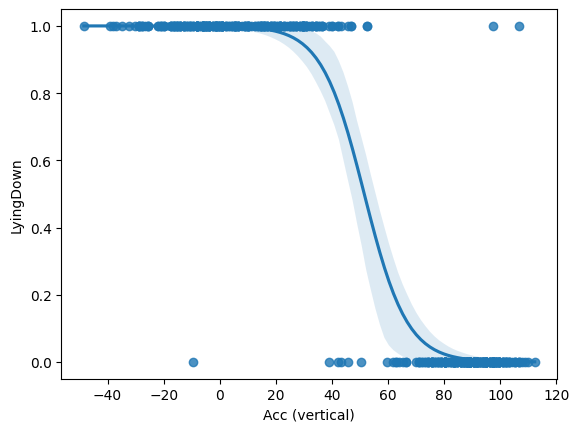

In [9]:
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic = True)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
clf.predict_proba(X_test)[::,-1]

array([2.31693308e-02, 9.97511568e-01, 1.04282071e-02, 1.05672351e-03,
       9.99781257e-01, 1.04282071e-02, 4.66017106e-03, 9.95733864e-01,
       9.72343955e-01, 2.31693308e-02, 9.97825589e-01, 1.36212174e-02,
       3.43616982e-02, 9.95733864e-01, 9.98892860e-01, 5.75929752e-02,
       4.77298577e-01, 6.09795092e-03, 9.98732777e-01, 9.92695617e-01,
       3.91403776e-02, 9.31712676e-01, 9.64063419e-01, 1.55638073e-02,
       9.83708329e-01, 1.19195424e-02, 7.55107906e-01, 8.74057100e-01,
       3.43616982e-02, 9.91646273e-01, 1.77763901e-02, 1.19195424e-02,
       9.97152314e-01, 2.64340977e-02, 9.98892860e-01, 1.19195424e-02,
       9.31712676e-01, 9.95119247e-01, 9.00935568e-01, 9.22594161e-01,
       8.39846087e-02, 9.99624389e-01, 1.19195424e-02, 8.01629006e-01,
       5.33106480e-03, 1.36212174e-02, 3.01447030e-02, 3.55976011e-03,
       4.07288328e-03, 1.19195424e-02, 9.98892860e-01, 6.53836704e-02,
       4.07288328e-03, 9.98892860e-01, 9.12067619e-03, 9.53422359e-01,
      

# Confusion Matrix

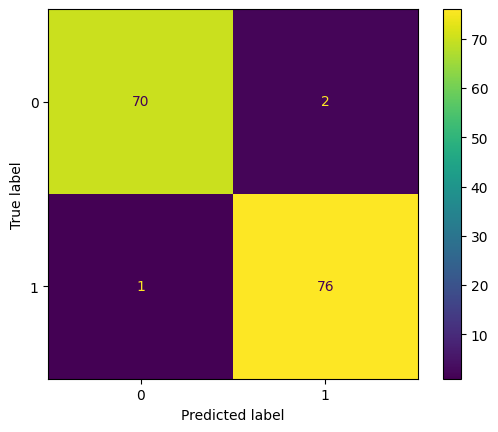

In [18]:
# Confusion Matrix
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

# True Negatives | False Positives
# False Negatives | True Positives

In [13]:
#Precision
import sklearn.metrics as metrics

metrics.precision_score(y_test, y_pred)

0.9743589743589743

In [14]:
metrics.recall_score(y_test, y_pred)

0.987012987012987

In [15]:
metrics.accuracy_score(y_test,y_pred)

0.9798657718120806

# ROC_AUC

* **ROC test**
    *  Gives the **correct threshold number** for logistic regression for the most accurate model
    *  False positive rate (x-axis), True positive rate (y-axis)
    *  1-specificity (x), sensitivity (y)
    *  Use **precision instead of False Postiive Rate** (y-axis) for *rare disease studies*

* **AUC**
    *  Area Under the Curve
    *  Makes it easy to **compare one ROC curve to another**
    *  **Greater AUC means better** 